# Fit of model function to data

The scipy module optimize contains various optimization and root finding methods. In the following we try to use the curve_fit function, a non-linear least square solver. The result are model parameters that are in best agreement with the observations (data). 

 * Model: sin() with 4 free parameters 
     * frequency
     * amplitude
     * phase
     * offset
 * Data: Air temperature in Hamburg
     * Seasonal cycle
     * Weekly
     * 53 data points

## Read in the data and calculate seasonal mean on weekly basis using Pandas

In [15]:
%pylab inline
import pandas as pd
from scipy.optimize import curve_fit

fn='dwdstation_hamburg_fuhlsbuettel_kl_10147.csv'
DF=pd.read_csv(fn,encoding = "ISO-8859-1",usecols=[6,7,8,15],parse_dates=[[0,1,2]])
DF.columns=['Date','T'] # Make column names shorter
DF['T']=DF['T'].astype(float)
dates=pd.to_datetime(DF['Date'].values)
week_index=dates.to_period(freq='W-MON')
DF['week index']=week_index.week
seasonal=DF.groupby('week index').mean().values[:,0]


Populating the interactive namespace from numpy and matplotlib


## Fit the model using scipy.optimize

Text(0,0.5,'Temperature [$^\\circ$ C]')

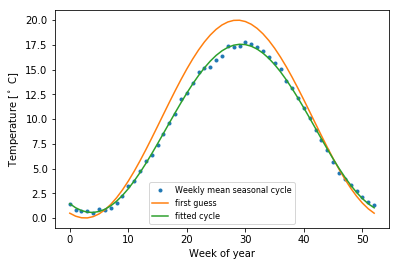

In [18]:
# Representation of the seasonal cycle with a simple sine function
def my_seasonal(x, freq, amplitude, phase, offset):
    return sin(x * freq + phase) * amplitude + offset

x=arange(len(seasonal))

p0=[2*pi/52,10,-0.6*pi,10] # First guess parameter
# now do the fit
fit = curve_fit(my_seasonal, x, seasonal, p0=p0)

# recreate the fitted curve using the optimized parameters
plot(seasonal, '.',label='Weekly mean seasonal cycle')
plot(my_seasonal(x,*p0), label='first guess')
plot(my_seasonal(x, *fit[0]), label='fitted cycle')
legend(fontsize=8)
xlabel('Week of year')
ylabel('Temperature [$^\circ$ C]')